In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,4.8
#15, 6

In [3]:
data = pd.read_csv('C:/Users/C00310965/Documents/livros/source/traffic_df.csv',sep=';')
print data.head()
print '\n Data Types:'
print data.dtypes

   enodebid    enodeb  locellid   cellname             datetime  gp  \
0    610147  EDFSQS01         0  EDFSQS01A  2016-02-01 00:00:00  60   
1    610147  EDFSQS01         0  EDFSQS01A  2016-02-01 01:00:00  60   
2    610147  EDFSQS01         0  EDFSQS01A  2016-02-01 02:00:00  60   
3    610147  EDFSQS01         0  EDFSQS01A  2016-02-01 03:00:00  60   
4    610147  EDFSQS01         0  EDFSQS01A  2016-02-01 04:00:00  60   

   dl_traffic_mb  average_user_volume  
0       0.162631                0.011  
1       0.092957                0.025  
2       0.018786                0.020  
3       0.000084                0.001  
4       0.002702                0.001  

 Data Types:
enodebid                 int64
enodeb                  object
locellid                 int64
cellname                object
datetime                object
gp                       int64
dl_traffic_mb          float64
average_user_volume    float64
dtype: object


In [4]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')
data = pd.read_csv('C:/Users/C00310965/Documents/livros/source/traffic_df.csv',sep=';', parse_dates=['datetime'], index_col='datetime',date_parser=dateparse)
print data.head()
print '\n Data Types:'
print data.dtypes

                     enodebid    enodeb  locellid   cellname  gp  \
datetime                                                           
2016-02-01 00:00:00    610147  EDFSQS01         0  EDFSQS01A  60   
2016-02-01 01:00:00    610147  EDFSQS01         0  EDFSQS01A  60   
2016-02-01 02:00:00    610147  EDFSQS01         0  EDFSQS01A  60   
2016-02-01 03:00:00    610147  EDFSQS01         0  EDFSQS01A  60   
2016-02-01 04:00:00    610147  EDFSQS01         0  EDFSQS01A  60   

                     dl_traffic_mb  average_user_volume  
datetime                                                 
2016-02-01 00:00:00       0.162631                0.011  
2016-02-01 01:00:00       0.092957                0.025  
2016-02-01 02:00:00       0.018786                0.020  
2016-02-01 03:00:00       0.000084                0.001  
2016-02-01 04:00:00       0.002702                0.001  

 Data Types:
enodebid                 int64
enodeb                  object
locellid                 int64
cellname  

In [5]:
data.index

DatetimeIndex(['2016-02-01 00:00:00', '2016-02-01 01:00:00',
               '2016-02-01 02:00:00', '2016-02-01 03:00:00',
               '2016-02-01 04:00:00', '2016-02-01 05:00:00',
               '2016-02-01 06:00:00', '2016-02-01 07:00:00',
               '2016-02-01 08:00:00', '2016-02-01 09:00:00',
               ...
               '2016-11-06 14:00:00', '2016-11-06 15:00:00',
               '2016-11-06 16:00:00', '2016-11-06 17:00:00',
               '2016-11-06 18:00:00', '2016-11-06 19:00:00',
               '2016-11-06 20:00:00', '2016-11-06 21:00:00',
               '2016-11-06 22:00:00', '2016-11-06 23:00:00'],
              dtype='datetime64[ns]', name=u'datetime', length=6679, freq=None)

In [6]:
ts = data['dl_traffic_mb']
ts.head(10)

datetime
2016-02-01 00:00:00      0.162631
2016-02-01 01:00:00      0.092957
2016-02-01 02:00:00      0.018786
2016-02-01 03:00:00      0.000084
2016-02-01 04:00:00      0.002702
2016-02-01 05:00:00      8.227837
2016-02-01 06:00:00     28.238297
2016-02-01 07:00:00    201.878540
2016-02-01 08:00:00    465.036621
2016-02-01 09:00:00    604.217041
Name: dl_traffic_mb, dtype: float64

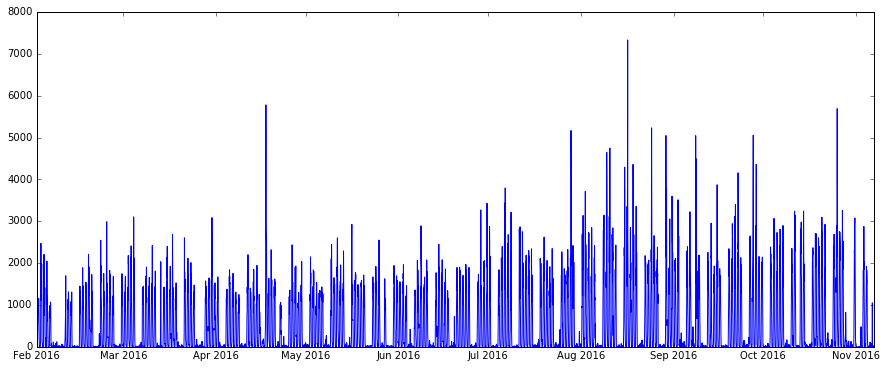

In [14]:
plt.plot(ts)

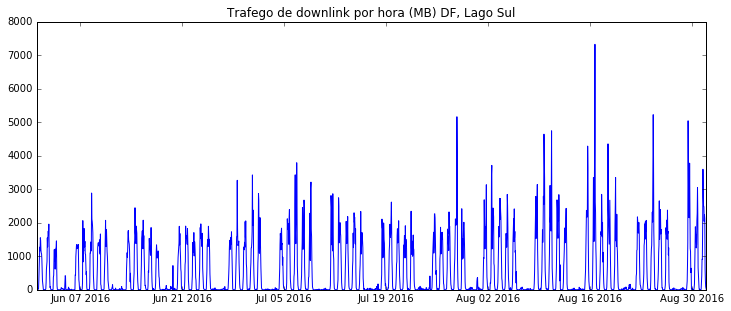

In [91]:
plt.plot(ts['2016-06':'2016-08'])
plt.title('Trafego de downlink por hora (MB) DF, Lago Sul')

In [7]:
###Group by date
ds = ts.groupby(pd.TimeGrouper(freq='d')).sum()
ds.head()

datetime
2016-02-01    10166.355008
2016-02-02    17226.750046
2016-02-03    15097.635652
2016-02-04    11393.502311
2016-02-05     9619.913809
Freq: D, Name: dl_traffic_mb, dtype: float64

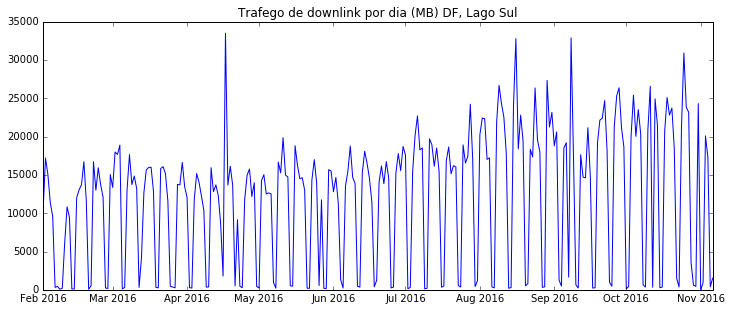

In [92]:
plt.plot(ds)
plt.title('Trafego de downlink por dia (MB) DF, Lago Sul')

In [64]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=24)
    rolstd = pd.rolling_std(timeseries, window=24)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).mean()
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).std()


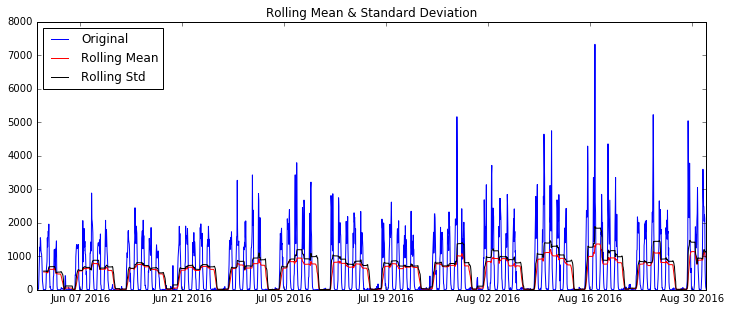

Results of Dickey-Fuller Test:
Test Statistic                -5.951445e+00
p-value                        2.142431e-07
#Lags Used                     2.600000e+01
Number of Observations Used    2.173000e+03
Critical Value (5%)           -2.862871e+00
Critical Value (1%)           -3.433363e+00
Critical Value (10%)          -2.567479e+00
dtype: float64


In [65]:
test_stationarity(ts['2016-06':'2016-08'])

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).mean()
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).std()


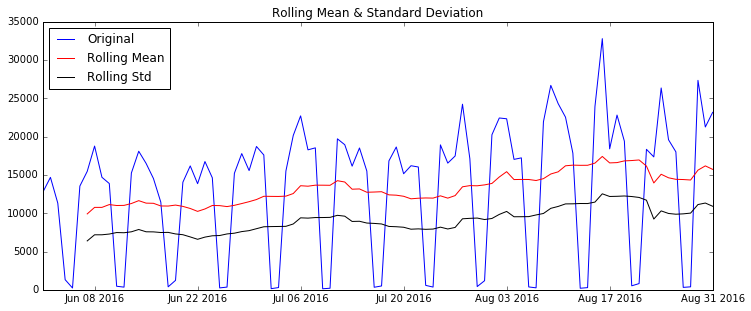

Results of Dickey-Fuller Test:
Test Statistic                 -1.419211
p-value                         0.573032
#Lags Used                      6.000000
Number of Observations Used    85.000000
Critical Value (5%)            -2.896195
Critical Value (1%)            -3.509736
Critical Value (10%)           -2.585258
dtype: float64


In [63]:
test_stationarity(ds['2016-06':'2016-08'])

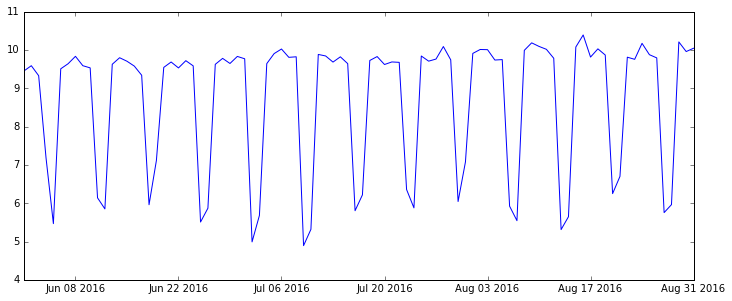

In [13]:
ds_log = np.log(ds['2016-06':'2016-08'])
plt.plot(ds_log)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).mean()
  if __name__ == '__main__':


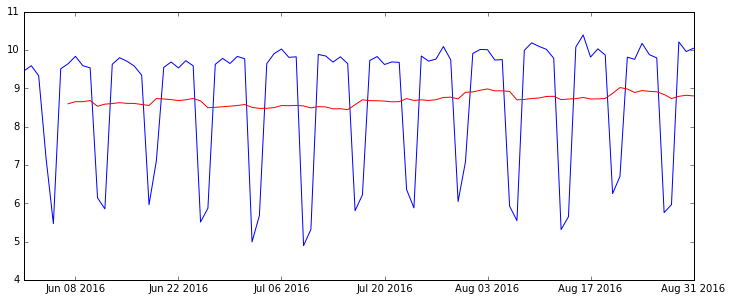

In [68]:
moving_avg = pd.rolling_mean(ds_log,7)
plt.plot(ds_log)
plt.plot(moving_avg, color='red')

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).mean()
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).std()


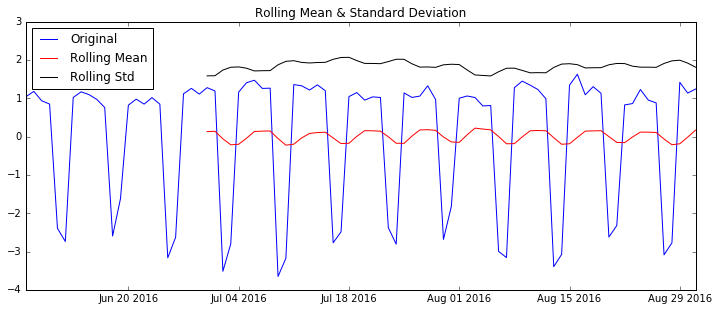

Results of Dickey-Fuller Test:
Test Statistic                 -4.031568
p-value                         0.001254
#Lags Used                      7.000000
Number of Observations Used    78.000000
Critical Value (5%)            -2.899375
Critical Value (1%)            -3.517114
Critical Value (10%)           -2.586955
dtype: float64


In [69]:
ds_log_moving_avg_diff = ds_log - moving_avg
ds_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ds_log_moving_avg_diff)

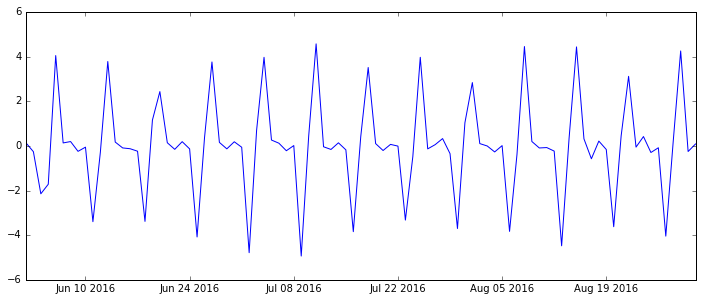

In [71]:
ds_log_diff = ds_log - ds_log.shift()
plt.plot(ds_log_diff)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).mean()
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).std()


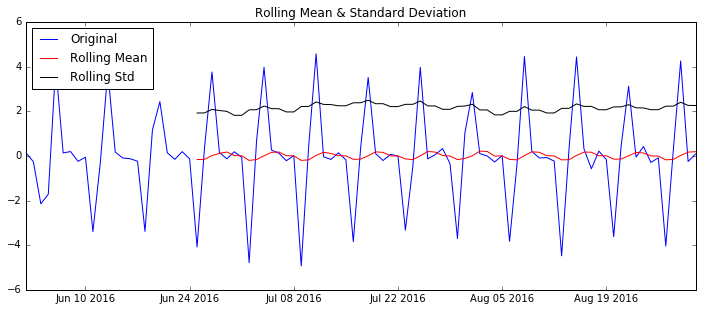

Results of Dickey-Fuller Test:
Test Statistic                 -4.571972
p-value                         0.000145
#Lags Used                     12.000000
Number of Observations Used    78.000000
Critical Value (5%)            -2.899375
Critical Value (1%)            -3.517114
Critical Value (10%)           -2.586955
dtype: float64


In [72]:
ds_log_diff.dropna(inplace=True)
test_stationarity(ds_log_diff)

In [73]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [78]:
lag_acf = acf(ds_log_diff, nlags=78)
lag_pacf = pacf(ds_log_diff, nlags=78, method='ols')

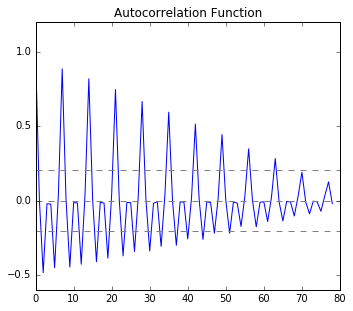

In [79]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ds_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ds_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

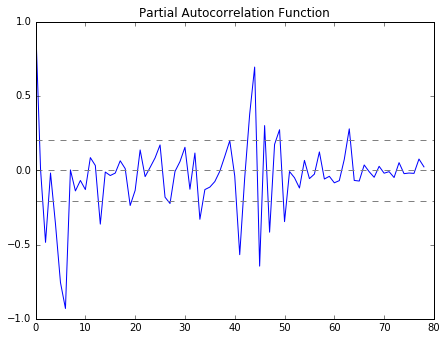

In [80]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ds_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ds_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

NameError: name 'label' is not defined

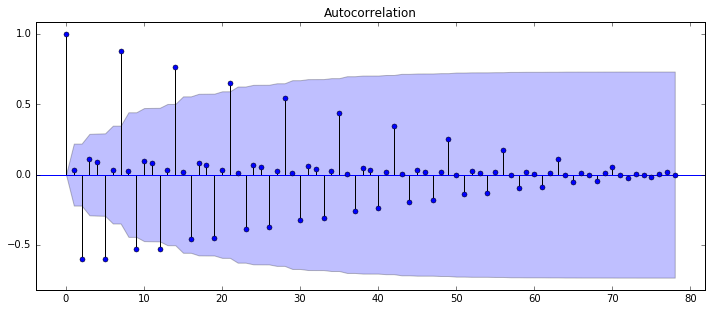

In [82]:
from statsmodels.graphics import tsaplots
tsaplots.plot_acf(lag_acf)
#label('Autocorrelation Function')

NameError: name 'label' is not defined

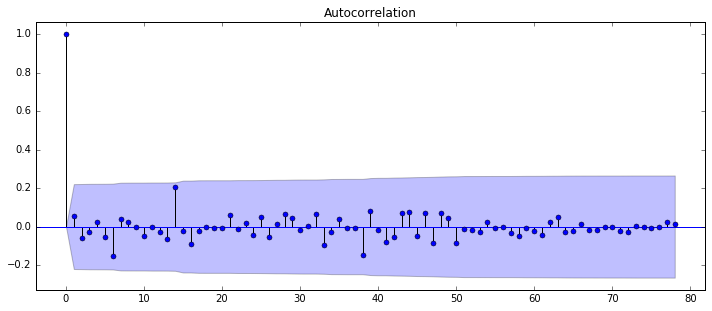

In [83]:
tsaplots.plot_acf(lag_pacf)
#label('Partial Autocorrelation Function')

In [12]:
from statsmodels.tsa.arima_model import ARIMA

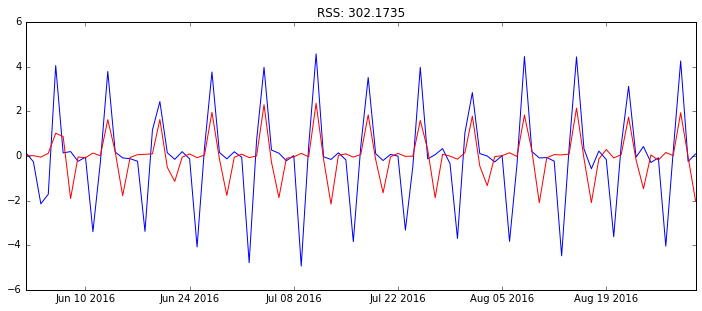

In [85]:
model = ARIMA(ds_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ds_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ds_log_diff)**2))

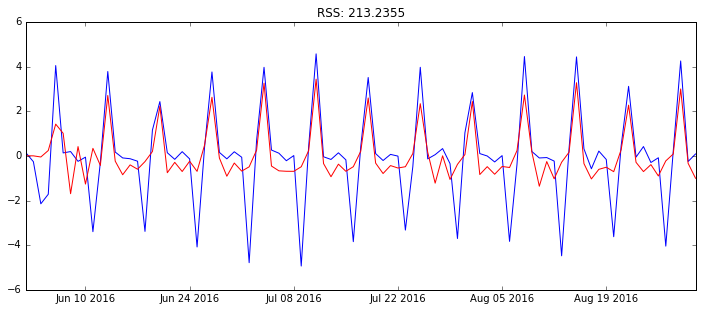

In [86]:
model = ARIMA(ds_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ds_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ds_log_diff)**2))

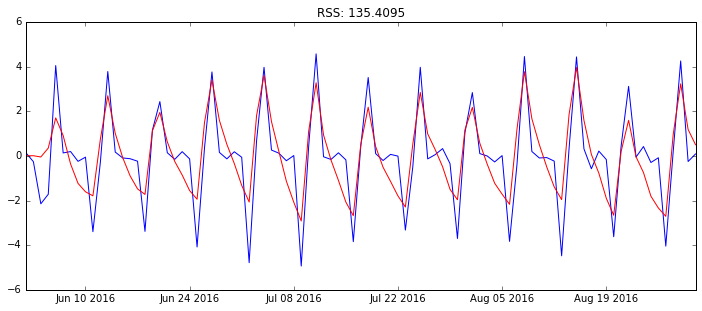

In [87]:
model = ARIMA(ds_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ds_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ds_log_diff)**2))

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ds_log)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

ValueError: freq D not understood. Please report if you think this in error.